<a href="https://colab.research.google.com/github/julia-freitas/TCC-2023/blob/main/04_analise_associacao_entre_variaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Diagrama Etapas do projeto

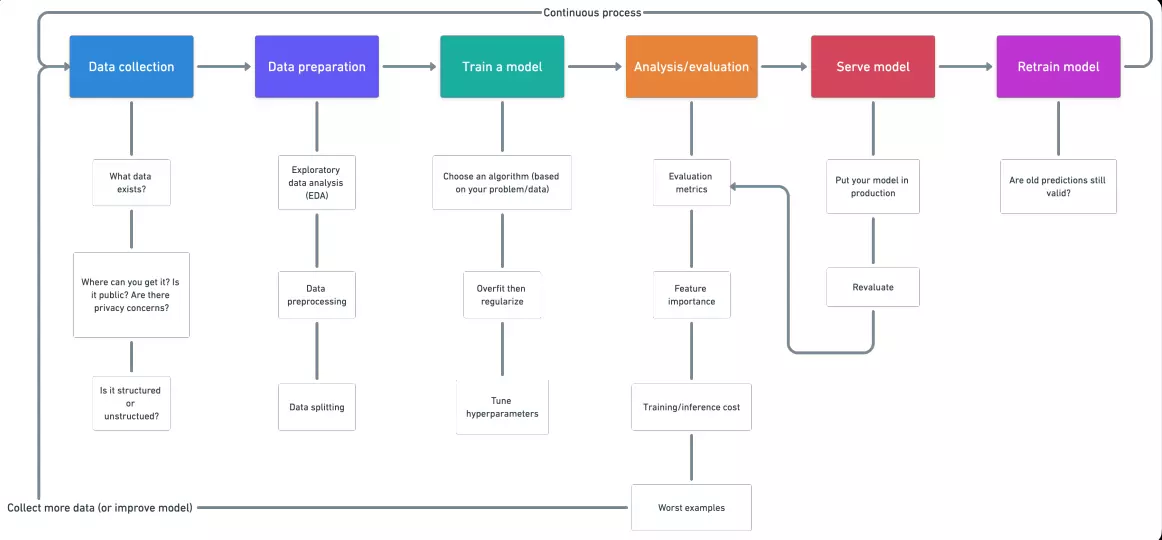

#### Import das bibliotecas e leitura da base de dados
[Base de dados importada](https://docs.google.com/spreadsheets/d/1xPHHgOXQMyMeYAcEJ_Rgv17tRWk7ulvA/edit?usp=drive_link&ouid=112262069800291344251&rtpof=true&sd=true) (utilizei aba 'base após limpeza')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/TCC/base/base-raw-UKDA-8502-stata/csv/base-apos-tratamento.csv')

In [4]:
df.columns

Index(['idauniq', 'indager', 'sex', 'saude_geral', 'hipertensao', 'angina',
       'ataque_cardiaco', 'insuf_cardiaca', 'diabetes', 'AVC', 'parkinson',
       'emotional', 'alzheimer', 'dementia', 'cancer', 'doenca_respiratoria',
       'nenhuma_doenca', 'visao', 'audicao', 'olfato', 'memoria', 'adl_vestir',
       'adl_caminhar', 'adl_banho', 'adl_comer', 'adl_sair_cama',
       'adl_banheiro', 'iadl_mapa', 'iadl_perigo', 'iadl_prep_comida',
       'iadl_mercado', 'iadl_telefonemas', 'iadl_fala', 'iadl_medicacao',
       'iadl_serv_domestico', 'iadl_financas', 'iadl_nenhuma', 'CESD_score',
       'adl_score', 'iadl_score', 'MMSE_score'],
      dtype='object')

In [5]:
df['saude_geral'] = df['saude_geral'].astype(object)
df['hipertensao'] = df['hipertensao'].astype(object)
df['angina'] = df['angina'].astype(object)
df['ataque_cardiaco'] = df['ataque_cardiaco'].astype(object)
df['insuf_cardiaca'] = df['insuf_cardiaca'].astype(object)
df['diabetes'] = df['diabetes'].astype(object)
df['AVC'] = df['AVC'].astype(object)
df['parkinson'] = df['parkinson'].astype(object)
df['emotional'] = df['emotional'].astype(object)
df['alzheimer'] = df['alzheimer'].astype(object)
#df['dementia'] = df['dementia'].astype(object)
df['cancer'] = df['cancer'].astype(object)
df['doenca_respiratoria'] = df['doenca_respiratoria'].astype(object)
df['nenhuma_doenca'] = df['nenhuma_doenca'].astype(object)
df['visao'] = df['visao'].astype(object)
df['audicao'] = df['audicao'].astype(object)
df['olfato'] = df['olfato'].astype(object)
df['memoria'] = df['memoria'].astype(object)
df['adl_vestir'] = df['adl_vestir'].astype(object)
df['adl_caminhar'] = df['adl_caminhar'].astype(object)
df['adl_banho'] = df['adl_banho'].astype(object)
df['adl_comer'] = df['adl_comer'].astype(object)
df['adl_sair_cama'] = df['adl_sair_cama'].astype(object)
df['adl_banheiro'] = df['adl_banheiro'].astype(object)
df['iadl_mapa'] = df['iadl_mapa'].astype(object)
df['iadl_perigo'] = df['iadl_perigo'].astype(object)
df['iadl_prep_comida'] = df['iadl_prep_comida'].astype(object)
df['iadl_mercado'] = df['iadl_mercado'].astype(object)
df['iadl_telefonemas'] = df['iadl_telefonemas'].astype(object)
df['iadl_fala'] = df['iadl_fala'].astype(object)
df['iadl_medicacao'] = df['iadl_medicacao'].astype(object)
df['iadl_serv_domestico'] = df['iadl_serv_domestico'].astype(object)
df['iadl_financas'] = df['iadl_financas'].astype(object)
df['iadl_nenhuma'] = df['iadl_nenhuma'].astype(object)

### Exploração dos dados


In [6]:
df.head()

,idauniq,indager,sex,saude_geral,hipertensao,angina,ataque_cardiaco,insuf_cardiaca,diabetes,AVC,...,iadl_telefonemas,iadl_fala,iadl_medicacao,iadl_serv_domestico,iadl_financas,iadl_nenhuma,CESD_score,adl_score,iadl_score,MMSE_score
0,106269,83,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,4,1,1,24
1,106891,82,2,3,0,0,0,0,0,0,...,0,0,0,1,0,0,2,2,2,22
2,108662,75,2,5,0,0,0,0,0,0,...,0,0,1,0,1,0,11,4,2,23
3,105965,74,2,3,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,25
4,105070,78,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,30


In [7]:
df.columns

Index(['idauniq', 'indager', 'sex', 'saude_geral', 'hipertensao', 'angina',
       'ataque_cardiaco', 'insuf_cardiaca', 'diabetes', 'AVC', 'parkinson',
       'emotional', 'alzheimer', 'dementia', 'cancer', 'doenca_respiratoria',
       'nenhuma_doenca', 'visao', 'audicao', 'olfato', 'memoria', 'adl_vestir',
       'adl_caminhar', 'adl_banho', 'adl_comer', 'adl_sair_cama',
       'adl_banheiro', 'iadl_mapa', 'iadl_perigo', 'iadl_prep_comida',
       'iadl_mercado', 'iadl_telefonemas', 'iadl_fala', 'iadl_medicacao',
       'iadl_serv_domestico', 'iadl_financas', 'iadl_nenhuma', 'CESD_score',
       'adl_score', 'iadl_score', 'MMSE_score'],
      dtype='object')

<Axes: >

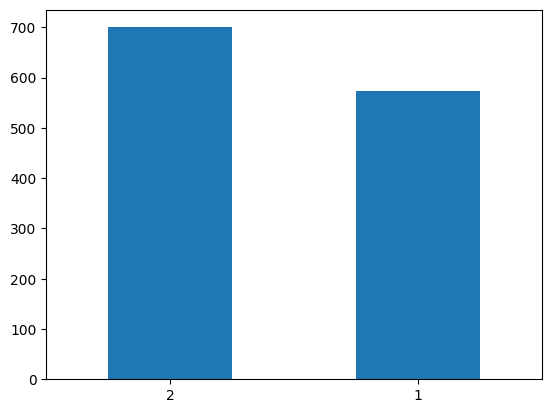

In [8]:
df['sex'].value_counts().plot(kind='bar', rot=0)

## Associacao entre duas variaveis

### Boxplot de idade, separado por genero

podemos observar que as medianas de idade estao bem proximas. Ainda que para confirmar, seja necessario realizar os testes de hipoteses

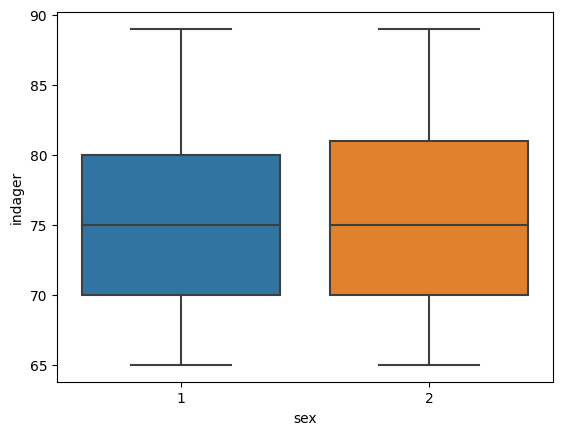

In [10]:
ax = sns.boxplot(x='sex', y='indager', data=df[df['indager'] < 100])

In [11]:
df['dementia'] <= 0

0       True
1       True
2       True
3       True
4       True
        ... 
1268    True
1269    True
1270    True
1271    True
1272    True
Name: dementia, Length: 1273, dtype: bool

In [12]:
cond1 = df[df['dementia'] >= 0]
#cond2 = df[df['indager'] < 100]

In [13]:
cond1.columns

Index(['idauniq', 'indager', 'sex', 'saude_geral', 'hipertensao', 'angina',
       'ataque_cardiaco', 'insuf_cardiaca', 'diabetes', 'AVC', 'parkinson',
       'emotional', 'alzheimer', 'dementia', 'cancer', 'doenca_respiratoria',
       'nenhuma_doenca', 'visao', 'audicao', 'olfato', 'memoria', 'adl_vestir',
       'adl_caminhar', 'adl_banho', 'adl_comer', 'adl_sair_cama',
       'adl_banheiro', 'iadl_mapa', 'iadl_perigo', 'iadl_prep_comida',
       'iadl_mercado', 'iadl_telefonemas', 'iadl_fala', 'iadl_medicacao',
       'iadl_serv_domestico', 'iadl_financas', 'iadl_nenhuma', 'CESD_score',
       'adl_score', 'iadl_score', 'MMSE_score'],
      dtype='object')

In [14]:
df= cond1[cond1['indager'] < 100]

In [15]:
df.shape

(1221, 41)

In [16]:
df.columns

Index(['idauniq', 'indager', 'sex', 'saude_geral', 'hipertensao', 'angina',
       'ataque_cardiaco', 'insuf_cardiaca', 'diabetes', 'AVC', 'parkinson',
       'emotional', 'alzheimer', 'dementia', 'cancer', 'doenca_respiratoria',
       'nenhuma_doenca', 'visao', 'audicao', 'olfato', 'memoria', 'adl_vestir',
       'adl_caminhar', 'adl_banho', 'adl_comer', 'adl_sair_cama',
       'adl_banheiro', 'iadl_mapa', 'iadl_perigo', 'iadl_prep_comida',
       'iadl_mercado', 'iadl_telefonemas', 'iadl_fala', 'iadl_medicacao',
       'iadl_serv_domestico', 'iadl_financas', 'iadl_nenhuma', 'CESD_score',
       'adl_score', 'iadl_score', 'MMSE_score'],
      dtype='object')

In [17]:
#df = df[df['indager'] < 100]

### Boxplot de casos de demencia por idade e genero

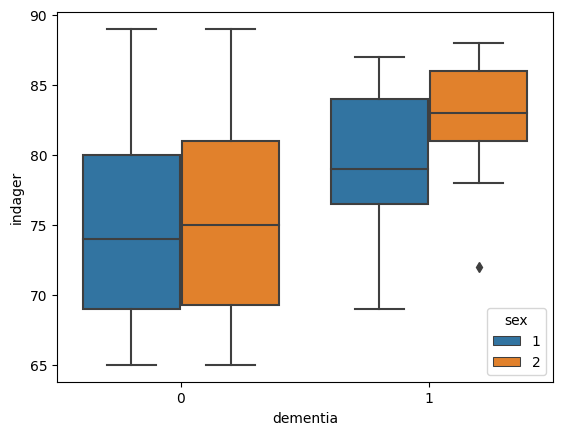

In [19]:
ax = sns.boxplot(x='dementia', y='indager', hue='sex', data=df)

In [20]:
df['dementia'].value_counts()

0    1190
1      31
Name: dementia, dtype: int64

<Axes: >

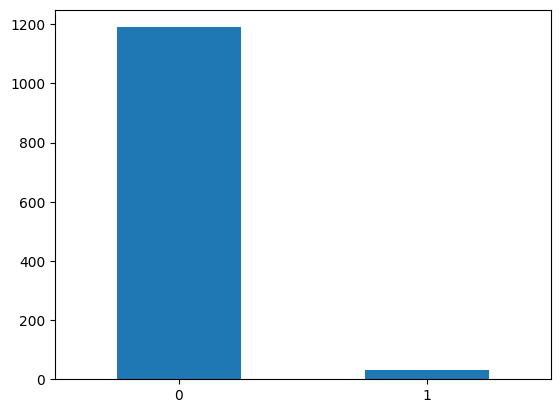

In [21]:
df['dementia'].value_counts().plot(kind='bar', rot=0)